In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# importing important libs
import pandas as pd
import numpy as np
from random import shuffle
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from wordcloud import WordCloud, STOPWORDS 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import os
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding
import warnings
warnings.filterwarnings('ignore')




#sklearn package 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB,MultinomialNB,GaussianNB 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,recall_score,precision_score,f1_score


In [2]:
df = pd.read_csv("news-data.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.shape
print("The shape of the dataset:->",df.shape)

The shape of the dataset:-> (2225, 2)


In [4]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
print("The number of null values :->")
print(df.isnull().sum())
column = df.columns
print("The column present there:->",column)

The number of null values :->
category    0
text        0
dtype: int64
The column present there:-> Index(['category', 'text'], dtype='object')


In [7]:
print("The total number category present here:->",df['category'].nunique())
category=df['category'].value_counts()
print(category)

The total number category present here:-> 5
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


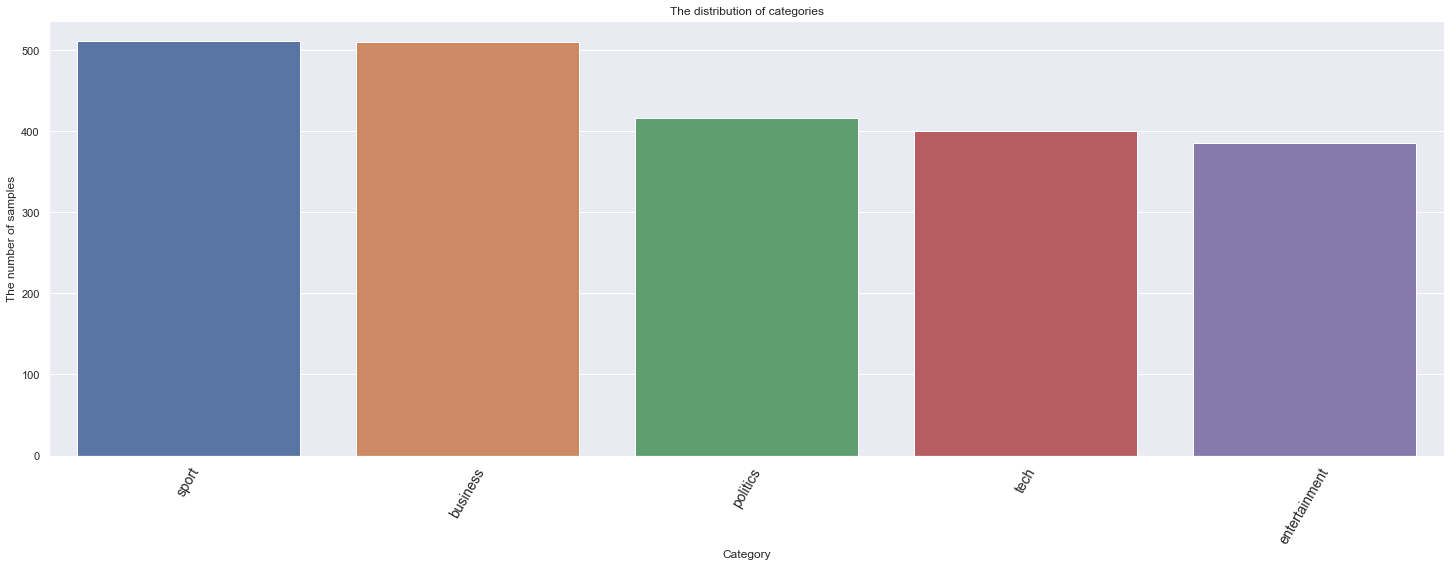

In [8]:
plt.figure(figsize=(25,8))
sns.barplot(x=category.index,y=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.xticks(rotation=60,fontsize = 14)
plt.show()

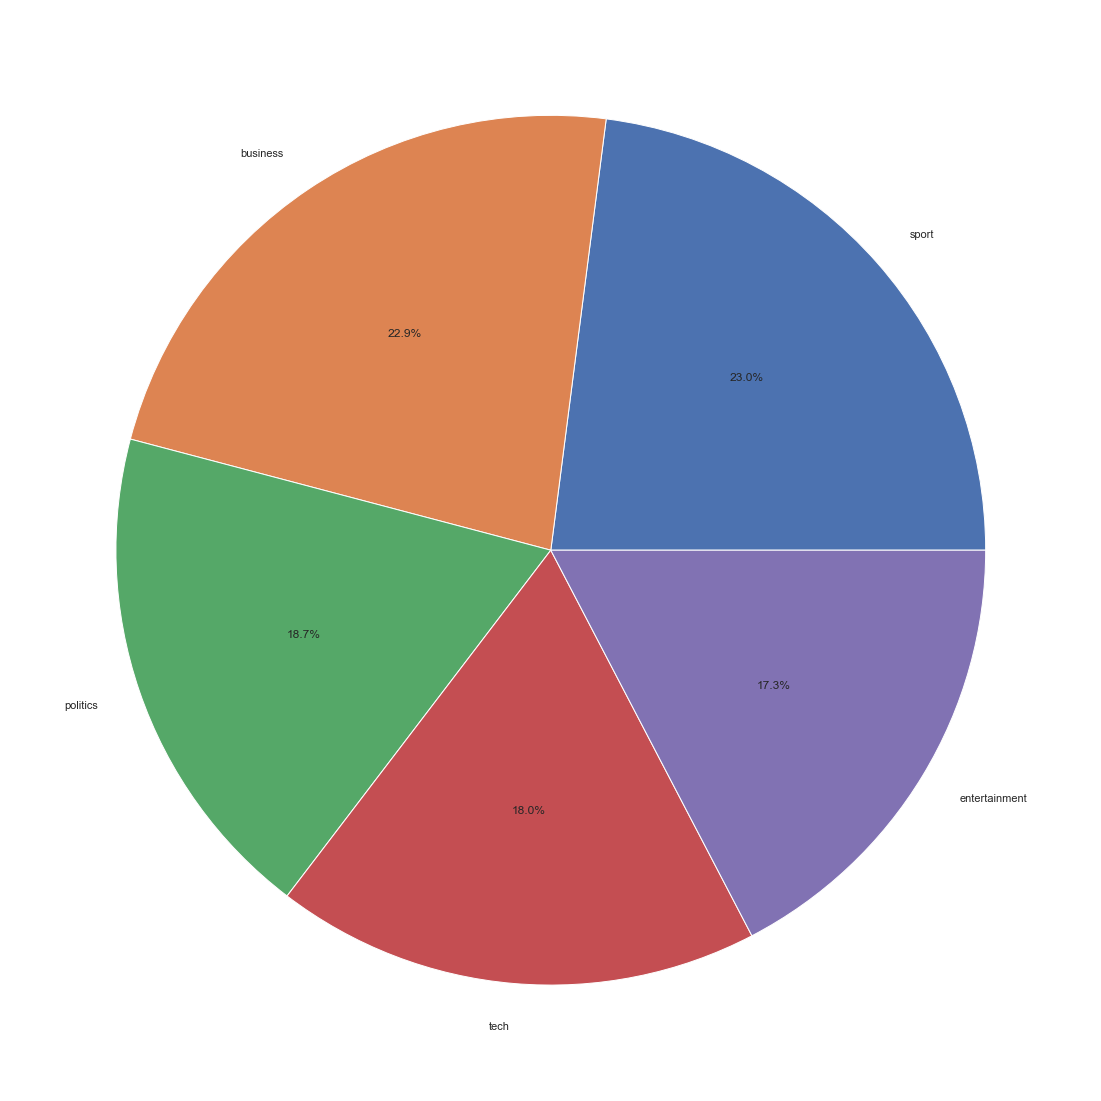

<Figure size 432x288 with 0 Axes>

In [9]:
#pie chart 
plt.figure(figsize=(20,20))
plt.pie(category.values, autopct="%1.1f%%", labels=category.index)
plt.show()
plt.savefig(r"./category_pie.png")

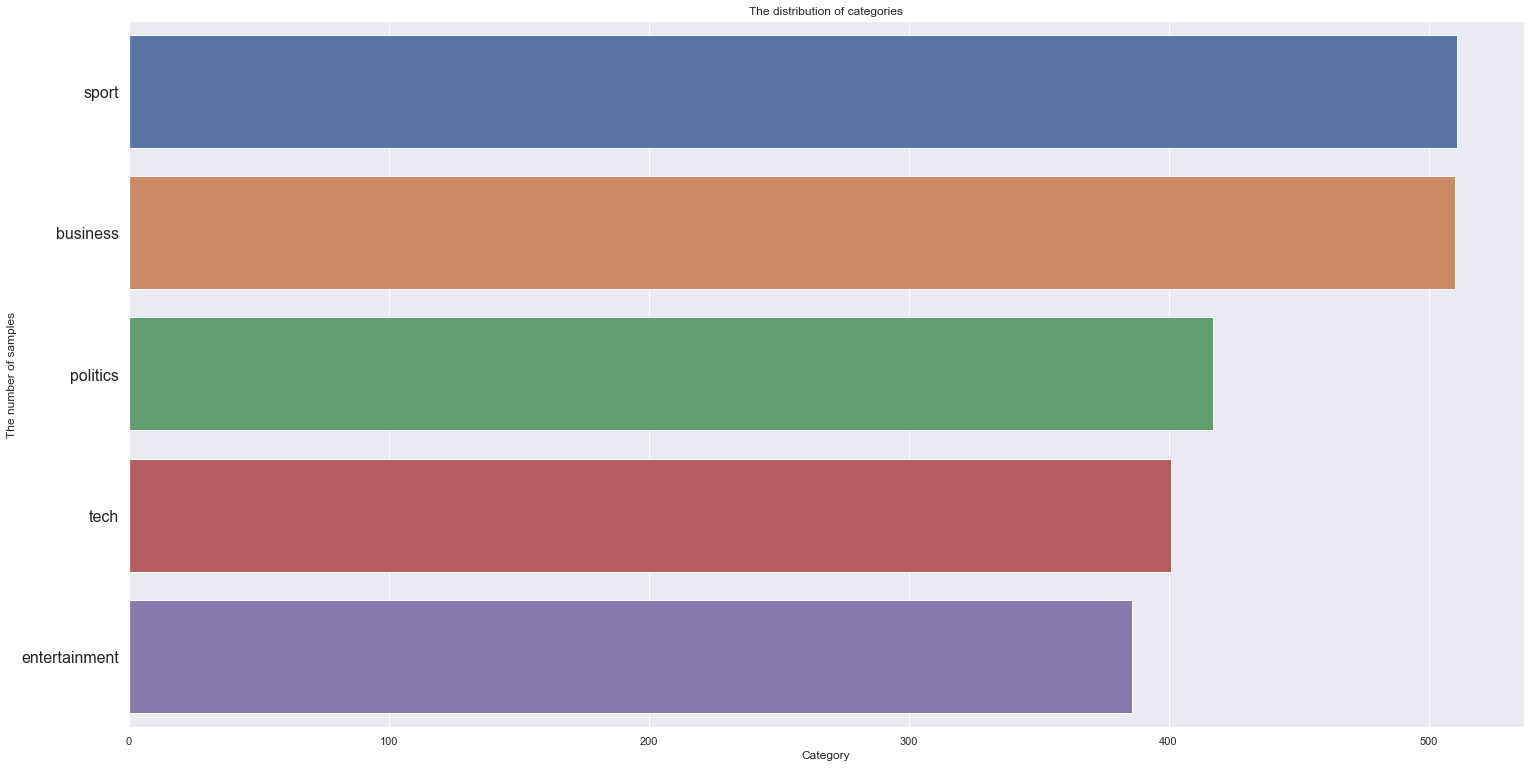

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(25,13))
sns.barplot(y=category.index,x=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.yticks(rotation=0,fontsize = 16)
plt.show()
plt.savefig(r"./category_bar.png")

# Handling the null and duplicate values in dataset


In [11]:
#delete the dublicate values
df.duplicated().sum() # count the total duplicate samples

99

In [12]:
df.drop_duplicates(keep='last',inplace=True)

In [13]:
df.duplicated(subset=['category', 'text']).sum()

0

In [14]:
print("THe length of the datset after dublicate deletion:->",df.shape)

THe length of the datset after dublicate deletion:-> (2126, 2)


#   Handling null values

In [15]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [16]:
# Associate Category names with numerical index and save it in new column category_id
df['category_id'] = df['category'].factorize()[0]

#View first 10 entries of category_id, as a normal check
df['category_id'][0:10]

0     0
1     1
2     2
3     2
5     3
6     3
7     2
8     2
9     4
10    4
Name: category_id, dtype: int64

In [17]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [18]:
category_id_df

,category,category_id
0,tech,0
1,business,1
2,sport,2
5,politics,3
9,entertainment,4


In [19]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [20]:
id_to_category

{0: 'tech', 1: 'business', 2: 'sport', 3: 'politics', 4: 'entertainment'}

In [21]:
df.sample(5, random_state=0)

,category,text,category_id
703,sport,owen set for skipper role wales number eight m...,2
1829,business,wipro beats forecasts once again wipro india ...,1
1308,entertainment,fockers retain film chart crown comedy meet th...,4
1904,tech,no half measures with half-life 2 could half-l...,0
882,tech,web logs aid disaster recovery some of the mos...,0


In [22]:
# create a list of categories
total_categories = df.category.unique()
#create a list of responses for each categories using a list comprehension
corpus = [' '.join(df[(df.category==categories)].text.tolist()) for categories in total_categories]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=total_categories

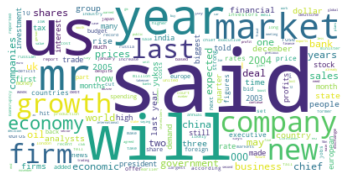

In [23]:
# create a pandas Series of the top 1000 most frequent words
text=bow.loc['business'].sort_values(ascending=False)[:1000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['business'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

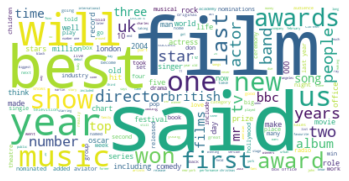

In [24]:
text=bow.loc['entertainment'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['entertainment'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

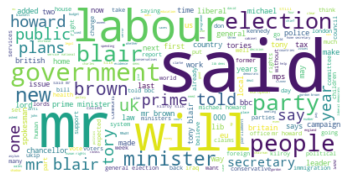

In [25]:
text=bow.loc['politics'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['politics'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

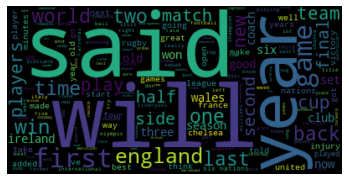

In [26]:
text=bow.loc['sport'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['sport'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='black')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

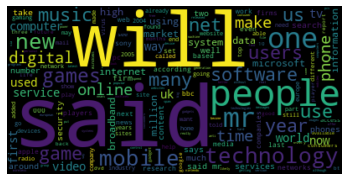

In [27]:
text=bow.loc['tech'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['tech'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='black')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
"""corpus=[]
for i in range(100000):
    text = data.iloc[i,1]
    
    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    text = text.split()
    
    s = PorterStemmer()
    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text = ' '.join(text)
    corpus.append(text)
    
    if i%1000==0:
        print(i,end='->')"""


"corpus=[]\nfor i in range(100000):\n    text = data.iloc[i,1]\n    \n    text = text.lower()\n    text = re.sub('[^a-z0-9]',' ',text)\n    text = text.split()\n    \n    s = PorterStemmer()\n    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]\n    text = ' '.join(text)\n    corpus.append(text)\n    \n    if i%1000==0:\n        print(i,end='->')"

In [29]:
"""corpus = pd.read_csv('../input/corpus/corpus.csv')
corpus"""

"corpus = pd.read_csv('../input/corpus/corpus.csv')\ncorpus"

In [30]:
#train and test split
X = df['text']
#label encoding the target
label = LabelEncoder()
y = label.fit_transform(df['category'])

#split the train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=2)

In [31]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (1913,)
The X_text shape------> (213,)
THe y_train shape-----> (1913,)
The y_test shape------> (213,)


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vecto =  CountVectorizer()
vecto = vecto.fit(X_train)

print(vecto.vocabulary_)

X_train = vecto.transform(X_train).toarray()

X_test = vecto.transform(X_test).toarray()
X_train.shape


{'mp': 17045, 'attacked': 2897, 'by': 4741, 'muggers': 17082, 'in': 13195, 'kenya': 14458, 'an': 2289, 'has': 12127, 'had': 11906, 'more': 16927, 'than': 25249, '600': 1052, 'and': 2322, 'his': 12501, 'passport': 18656, 'stolen': 24191, 'after': 1869, 'being': 3573, 'mugged': 17081, 'six': 23187, 'men': 16391, 'park': 18573, 'quentin': 20265, 'davies': 7292, 'the': 25265, 'for': 10621, 'grantham': 11635, 'stamford': 23966, 'was': 27240, 'notoriously': 17698, 'dangerous': 7231, 'capital': 4925, 'nairobi': 17225, 'he': 12206, 'not': 17668, 'hurt': 12864, 'mugging': 17083, 'on': 17983, 'saturday': 22144, 'evening': 9579, 'several': 22684, 'people': 18845, 'are': 2617, 'questioned': 20273, 'over': 18287, 'attack': 2896, 'before': 3544, 'travelling': 25828, 'to': 25525, 'sudan': 24468, 'with': 27656, 'parliamentary': 18583, 'committee': 6055, 'local': 15416, 'police': 19381, 'were': 27407, 'said': 22004, 'be': 3455, 'surprised': 24646, 'area': 2618, 'mr': 17057, '60': 1051, 'occurred': 1785

(1913, 28101)

In [33]:
print(vecto.get_feature_names())

['00', '000', '0001', '000bn', '000m', '000s', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '011', '0130', '02', '0200', '0227', '028', '03', '0300', '033', '037', '03bn', '04', '0400', '041', '04bn', '04m', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '060', '0619', '0630', '069', '06bn', '07', '070', '0700', '0710', '072', '0730', '07bn', '080', '0800', '081', '086', '0870', '088', '08bn', '09', '0900', '093', '0950', '09bn', '09secs', '10', '100', '1000', '1000m', '1000th', '100bn', '100m', '100ml', '100s', '101', '102', '102m', '103', '1030', '103m', '104', '104m', '105', '105bn', '105m', '106', '106cm', '106m', '107', '108', '1080', '109', '10bn', '10cm', '10ft', '10k', '10km', '10m', '10s', '10secs', '10th', '10x7in', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '113th', '114', '115', '116', '116i', '117', '117m', '117th', '118', '118m', '119', '119bn', '119m', '11b', '11

In [34]:
tfidf_df = pd.DataFrame(X_train,columns = vecto.get_feature_names())
tfidf_df.head(4)

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zoom,zooms,zooropa,zornotza,zorro,zubair,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (1913, 28101)
The X_text shape------> (213, 28101)
THe y_train shape-----> (1913,)
The y_test shape------> (213,)


  # Model training

In [36]:
def classifier_scores(y_train,y_test, pred_train, pred_test):
    
    print()
    print("Train data accuracy score: ", accuracy_score(y_train,pred_train))    
    print("Test data accuracy score: ", accuracy_score(y_test,pred_test))
    print()
    print("Recall score on train data: ", recall_score(y_train,pred_train, average='macro'))
    print("Recall score on test data: ",recall_score( y_test,pred_test, average='macro'))
    print()
    
    print("Precision score on train data: ",precision_score(y_train,pred_train, average='macro'))
    print("Precision score on test data: ",precision_score(y_test,pred_test, average='macro'))
    print()
    print("F1 score on train data: ",f1_score(y_train,pred_train, average='macro'))
    print("F1 score on test data: ",f1_score(y_test,pred_test, average='macro'))

In [37]:
print("Multinamial NB----------------------------------->")
multinb = MultinomialNB()
multinb.fit(X_train , y_train)

y_train_pred = multinb.predict(X_train)
y_test_pred = multinb.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)

Multinamial NB----------------------------------->

Train data accuracy score:  0.992681651855724
Test data accuracy score:  0.9577464788732394

Recall score on train data:  0.9929518870341832
Recall score on test data:  0.9633376623376624

Precision score on train data:  0.9919113429930368
Precision score on test data:  0.9488888888888889

F1 score on train data:  0.9924055778545068
F1 score on test data:  0.9533099143490027


In [38]:
print("Compiment NB----------------------------------->")
compnb = ComplementNB(alpha=1.0)
compnb.fit(X_train , y_train)

y_train_pred = compnb.predict(X_train)
y_test_pred = compnb.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)

Compiment NB----------------------------------->

Train data accuracy score:  0.9947726084683742
Test data accuracy score:  0.9624413145539906

Recall score on train data:  0.9950890854833464
Recall score on test data:  0.9661688311688312

Precision score on train data:  0.9942913204153372
Precision score on test data:  0.9537229437229436

F1 score on train data:  0.9946760626930937
F1 score on test data:  0.9582867370104999


In [39]:
#model training
gaussion_NB = GaussianNB()
gaussion_NB.fit(X_train , y_train)

y_train_pred = gaussion_NB.predict(X_train)
y_test_pred = gaussion_NB.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.8967136150234741

Recall score on train data:  1.0
Recall score on test data:  0.8973896103896104

Precision score on train data:  1.0
Precision score on test data:  0.8854335188620903

F1 score on train data:  1.0
F1 score on test data:  0.88965547895776


In [40]:
#logistic Regresssion

log_reg = LogisticRegression()

log_reg.fit(X_train , y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.971830985915493

Recall score on train data:  1.0
Recall score on test data:  0.9707142857142858

Precision score on train data:  1.0
Precision score on test data:  0.9688113506272075

F1 score on train data:  1.0
F1 score on test data:  0.9694993418083617


In [41]:
#logistric regression more accuracy
log_reg_hyper = LogisticRegression(solver='liblinear',n_jobs=-1,penalty='l2',)
log_reg_hyper.fit(X_train , y_train)

y_train_pred = log_reg_hyper.predict(X_train)
y_test_pred = log_reg_hyper.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.971830985915493

Recall score on train data:  1.0
Recall score on test data:  0.9707142857142858

Precision score on train data:  1.0
Precision score on test data:  0.9688113506272075

F1 score on train data:  1.0
F1 score on test data:  0.9694993418083617


In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.8075117370892019

Recall score on train data:  1.0
Recall score on test data:  0.8027532467532467

Precision score on train data:  1.0
Precision score on test data:  0.7988220551378447

F1 score on train data:  1.0
F1 score on test data:  0.8003724967396113


In [43]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train , y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.9624413145539906

Recall score on train data:  1.0
Recall score on test data:  0.952077922077922

Precision score on train data:  1.0
Precision score on test data:  0.9679142496847415

F1 score on train data:  1.0
F1 score on test data:  0.958706124043189


In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train , y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  0.9822268687924726
Test data accuracy score:  0.9295774647887324

Recall score on train data:  0.9805426486902041
Recall score on test data:  0.9192467532467532

Precision score on train data:  0.9832476336020655
Precision score on test data:  0.9282896188778542

F1 score on train data:  0.9817528961708983
F1 score on test data:  0.9232112098421503


In [45]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)

[19:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train data accuracy score:  1.0
Test data accuracy score:  0.9671361502347418

Recall score on train data:  1.0
Recall score on test data:  0.9625974025974026

Precision score on train data:  1.0
Precision score on test data:  0.9642220524573466

F1 score on train data:  1.0
F1 score on test data:  0.963350123832259
